In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
import math
import seaborn as sns
import networkx as nx
from visualization import plot_data
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/home/janek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## Data analysis

In [3]:
df = pd.read_csv ("dataset_adv.csv", index_col='match_id')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10000 entries, 5150167044.0 to 5146862871.0
Columns: 191 entries, 0_actions_per_min to rad_won
dtypes: float64(191)
memory usage: 14.6 MB


In [4]:
df.head()

0_actions_per_min  0_assists  0_courier_kills  0_deaths  \
match_id                                                                
5.150167e+09  147.701705         11.621543  0.059353         5.724567   
5.319970e+09  266.251781         11.364090  0.089738         7.153348   
5.350598e+09  149.492647         11.377288  0.036232         6.621290   
5.172632e+09  205.203333         11.947823  0.106271         6.586747   
5.153867e+09  273.586094         12.210118  0.090387         6.235413   

               0_denies   0_duration  0_gold_per_min  0_hero_damage  \
match_id                                                              
5.150167e+09  5.713731   2206.049005  424.775352      12092.445113    
5.319970e+09  7.364862   2062.705246  448.696156      13825.082448    
5.350598e+09  12.215390  2224.541852  467.102897      15869.010060    
5.172632e+09  4.793033   2180.562893  396.253010      13323.564958    
5.153867e+09  6.833221   2160.178499  438.982462      14667.619053    

              0_hero_healing     0_kda   0_kills    0_level  0_neutral_kills  \
match_id                                                                       
5.150167e+09  667.292847      3.343846  6.794598  17.197800  22.197842         
5.319970e+09  668.187991      2.631038  7.612857  17.635791  14.988005         
5.350598e+09  369.323593      2.677626  6.974054  18.313133  62.280797         
5.172632e+09  715.876415      2.668610  5.314578  17.001136  39.174917         
5.153867e+09  1110.621065     3.060287  6.441400  18.066695  34.364544         

              0_num_matches    0_stuns  0_tower_damage  0_tower_kills  \
match_id                                                                
5.150167e+09  6183.0         25.989698  1424.181657     0.567446        
5.319970e+09  16831.0        39.367160  1134.534642     0.456242        
5.350598e+09  5629.0         36.187918  1962.394251     1.088768        
5.172632e+09  13211.0        34.903192  1362.560575     0.555116        
5.153867e+09  11861.0        29.662095  1666.659172     0.759551        

                 0_win  0_xp_per_min  1_actions_per_min  1_assists  \
match_id                                                             
5.150167e+09  0.533398  456.083616    258.421687         9.891434    
5.319970e+09  0.522726  492.800131    146.286896         11.463858   
5.350598e+09  0.509682  496.455127    194.273810         11.331842   
5.172632e+09  0.583302  445.253313    241.980051         11.079298   
5.153867e+09  0.546413  484.498988    226.238785         9.726269    

              1_courier_kills  1_deaths   1_denies   1_duration  \
match_id                                                          
5.150167e+09  0.144578         4.617530  10.031873  2019.407371   
5.319970e+09  0.094781         5.932893  9.012284   2069.227716   
5.350598e+09  0.095238         6.123043  8.922446   1941.224459   
5.172632e+09  0.040514         5.877724  10.584594  2159.219431   
5.153867e+09  0.060687         4.635271  8.969585   2182.142016   

              1_gold_per_min  1_hero_damage  1_hero_healing     1_kda  \
match_id                                                                
5.150167e+09  554.659363      20396.432271   283.472112      4.755976   
5.319970e+09  505.874619      16044.222548   570.497608      3.223959   
5.350598e+09  563.493661      21397.461769   1083.703148     3.173751   
5.172632e+09  511.180236      17659.983054   405.495356      3.445672   
5.153867e+09  556.797155      20035.014195   567.509008      4.344861   

               1_kills    1_level  1_neutral_kills  1_num_matches    1_stuns  \
match_id                                                                       
5.150167e+09  8.489044  19.264940  109.783133       1004.0         31.042666   
5.319970e+09  7.205685  18.499086  47.273018        9850.0         35.731271   
5.350598e+09  7.004474  19.997017  72.059524        1341.0         26.872213   
5.172632e+09  7.890738  19.385442  69.138264        6609.0

In [125]:
print(df.columns)

Index(['0_actions_per_min', '0_assists', '0_courier_kills', '0_deaths',
       '0_denies', '0_duration', '0_gold_per_min', '0_hero_damage',
       '0_hero_healing', '0_kda',
       ...
       '9_kills', '9_level', '9_neutral_kills', '9_num_matches', '9_stuns',
       '9_tower_damage', '9_tower_kills', '9_win', '9_xp_per_min', 'rad_won'],
      dtype='object', length=191)


In [6]:
df.describe(include='all')

0_actions_per_min     0_assists  0_courier_kills      0_deaths  \
count  10000.000000       10000.000000  10000.000000     10000.000000   
mean   210.807996         11.597665     0.111274         6.382979       
std    60.020521          1.467882      0.062330         1.010453       
min    0.000000           2.000000      0.000000         3.259225       
25%    161.727297         10.664828     0.075249         5.638528       
50%    204.875912         11.656925     0.097907         6.294071       
75%    253.368762         12.647740     0.130966         6.966827       
max    462.277376         16.892516     1.870748         12.000000      

           0_denies    0_duration  0_gold_per_min  0_hero_damage  \
count  10000.000000  10000.000000  10000.000000    10000.000000    
mean   7.834671      2162.121797   474.984227      18112.565970    
std    2.814103      129.880693    63.012093       3843.954840     
min    1.600000      935.233492    199.000000      4406.000000     
25%    5.977444      2078.572090   433.306558      15260.059028    
50%    7.387354      2149.252357   473.921998      17550.229883    
75%    9.695749      2233.067719   518.598998      20647.470587    
max    22.000000     2868.291667   1301.559428     37428.039216    

       0_hero_healing         0_kda       0_kills       0_level  \
count  10000.000000    10000.000000  10000.000000  10000.000000   
mean   669.278003      3.248148      7.732220      19.016839      
std    351.979368      0.687240      1.590120      1.389614       
min    0.000000        0.000000      1.000000      10.000000      
25%    402.036172      2.818182      6.812783      18.162311      
50%    603.233875      3.209737      7.723054      18.819066      
75%    845.683519      3.640121      8.829241      19.797670      
max    3637.479498     6.571585      14.206299     25.478261      

       0_neutral_kills  0_num_matches       0_stuns  0_tower_damage  \
count  10000.000000     10000.000000   10000.000000  10000.000000     
mean   55.646242        8619.988400    30.653389     2213.826003      
std    31.406580        5162.347295    6.931934      843.686450       
min    0.000000         1.000000       0.000000      0.000000         
25%    32.769884        3941.000000    26.037277     1570.635509      
50%    50.406662        9477.000000    30.567952     2153.990120      
75%    70.495252        12563.000000   34.903192     2795.971776      
max    441.663265       22819.000000   85.787632     5592.465087      

       0_tower_kills         0_win  0_xp_per_min  1_actions_per_min  \
count  10000.000000   10000.000000  10000.000000  10000.000000        
mean   1.215259       0.533610      534.033272    207.564611          
std    0.537801       0.033110      67.610104     62.348613           
min    0.000000       0.000000      267.000000    0.000000            
25%    0.759551       0.516782      488.835155    157.444181          
50%    1.182692       0.527712      527.604346    195.694352          
75%    1.588619       0.544671      565.136380    250.182119          
max    3.390609       0.762289      1276.055409   443.423502          

          1_assists  1_courier_kills      1_deaths      1_denies  \
count  10000.000000  10000.000000     10000.000000  10000.000000   
mean   11.568681     0.118137         6.307267      8.370775       
std    1.666556      0.067533         1.068277      3.082491       
min    0.000000      0.000000         2.000000      0.500000       
25%    10.493643     0.072772         5.466573      6.109582       
50%    11.698198     0.100537         6.165859      7.915671       
75%    12.608929     0.142857         7.005822      10.573477      
max    19.916667     0.750000         12.000000     21.006000      

         1_duration  1_gold_per_min  1_hero_damage  1_hero_healing  \
count  10000.000000  10000.000000    10000.000000   10000.000000     
mean   2156.159690   485.355203      18999.479582   650.416475       
std    127.026983    67.13771

Below there are plots, that are showing correlations between all statistics types. We are interested in plots, that are similar to linear (but not constant) functions. These plots will indicate, that two attributes are dependent.

In [109]:
def plot_colligation(col_pairs):
    fig, ax = plt.subplots(math.ceil(len(col_pairs)/2), 2, figsize=(14,3.5*math.ceil(len(col_pairs)/2)))

    counter = 0
    for pair in col_pairs:
        df.plot.scatter(x=pair[0], y=pair[1] ,ax=ax[math.floor(counter/2),counter%2])
        counter+=1

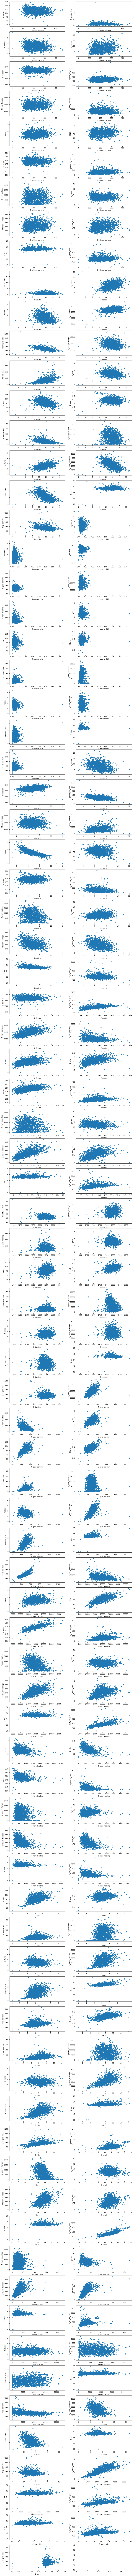

In [110]:
filter_col = [col for col in df if col.startswith('0')]
col_pairs = list(itertools.combinations(filter_col,2))
#col_pairs = [pair for pair in col_pairs if "0_win" in pair]
plot_colligation(col_pairs)

The most interesting plots, with strong attribute correlation are:
 - tower damage/tower kills
 - tower damage/kills / neutral kills
 - level/xp_per_minute
 - xp_per_minute/hero damage
 - level/hero damage
 - kills/hero damage
 - gold_per_min/xp_per_min
 - gold_per_min/level
 - gold_per_min/kills
 - gold_per_min/hero damage
 - kda/deaths

And in smaller correlation:
 - tower damage/kills / kills
 - tower damage/kills / gold_per_min
 - tower damage/kills / denies
 - kills/xp_per_min
 - kda/win
 - gold_per_min/kda

Bellow we have graph of dependiences and most important plots:



Stronger colligation on graph


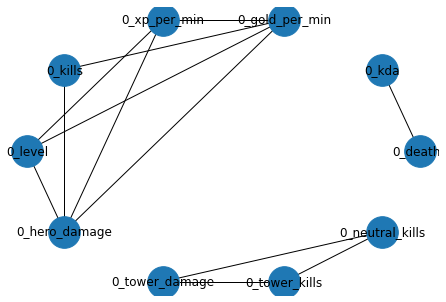

In [139]:
nodes_of_graph = ["0_deaths", "0_kda", "0_gold_per_min", "0_xp_per_min", "0_kills", "0_level", 
"0_hero_damage", "0_tower_damage", "0_tower_kills", "0_neutral_kills"]
edges_of_graph = [("0_tower_damage", "0_tower_kills"), ("0_tower_damage", "0_neutral_kills"), ("0_tower_kills", "0_neutral_kills"),
("0_level","0_xp_per_min"),("0_hero_damage","0_xp_per_min"),("0_hero_damage","0_level"), ("0_hero_damage","0_kills"),
("0_deaths", "0_kda"), ("0_gold_per_min", "0_xp_per_min"), ("0_gold_per_min", "0_kills"), 
("0_gold_per_min", "0_level"), ("0_gold_per_min", "0_hero_damage")]
G=nx.Graph()
G.add_nodes_from(nodes_of_graph)
G.add_edges_from(edges_of_graph)
print("Stronger colligation on graph")
nx.draw_circular(G, with_labels = True, node_size=1000)

Stronger colligation


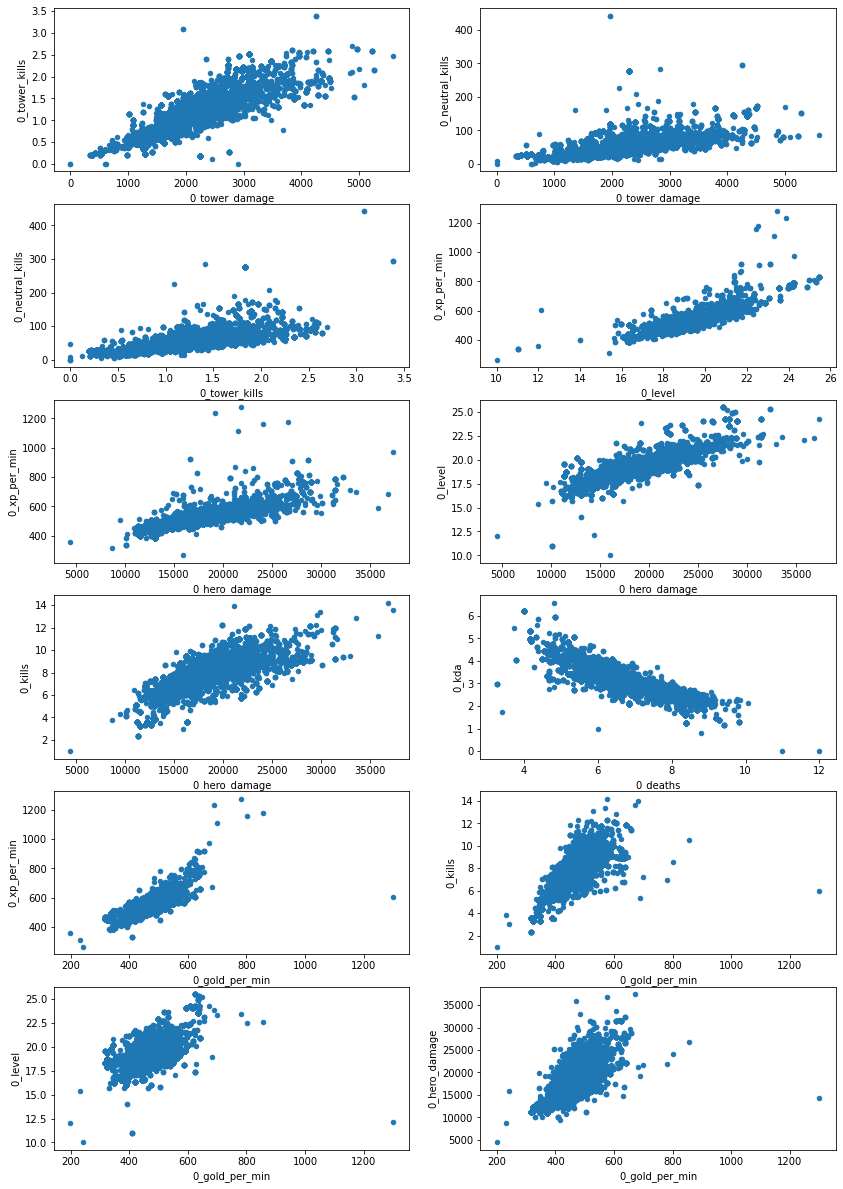

In [116]:
print("Stronger colligation")
plot_colligation(edges_of_graph)

Weaker colligation


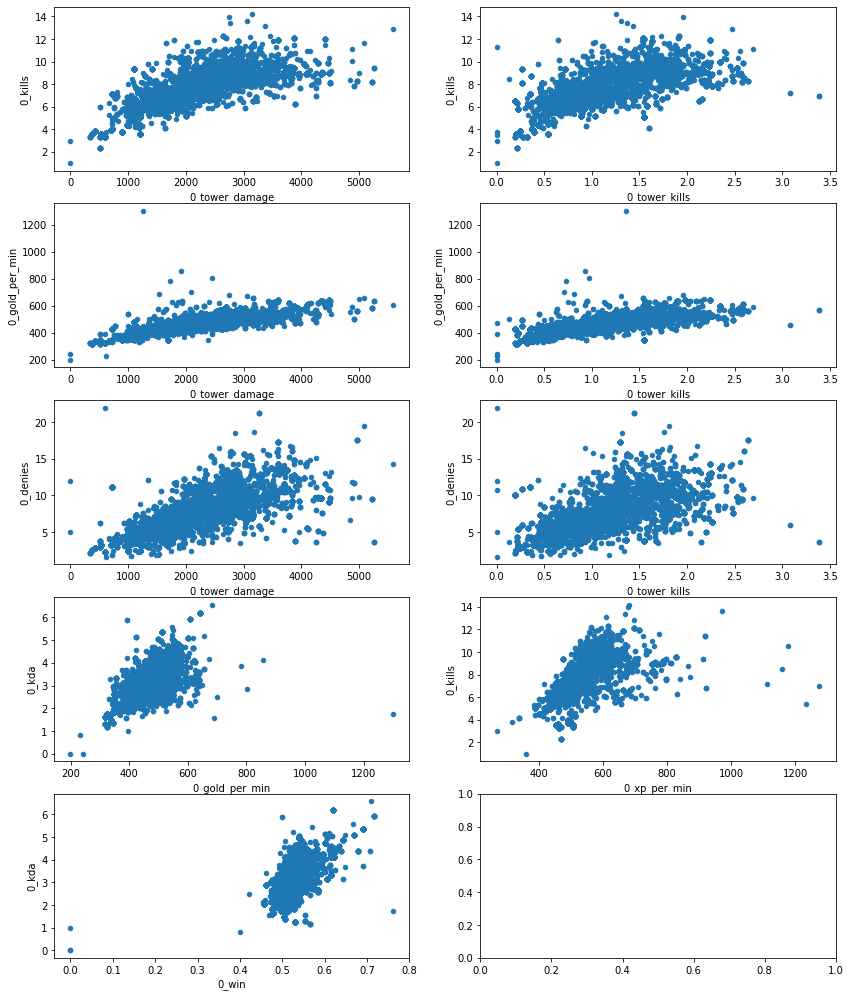

In [118]:
weaker_colligation = [("0_tower_damage", "0_kills"), ("0_tower_kills", "0_kills"),
("0_tower_damage", "0_gold_per_min"), ("0_tower_kills", "0_gold_per_min"),
("0_tower_damage", "0_denies"), ("0_tower_kills", "0_denies"),
("0_gold_per_min", "0_kda"), ("0_xp_per_min", "0_kills"), ("0_win", "0_kda")]
print("Weaker colligation")
plot_colligation(weaker_colligation)

As we know correlations between attributes, it would be good to know which one impact win_ratio most and if there are any significant differences between set of attributes from team, that have won match and the team that have lost match.

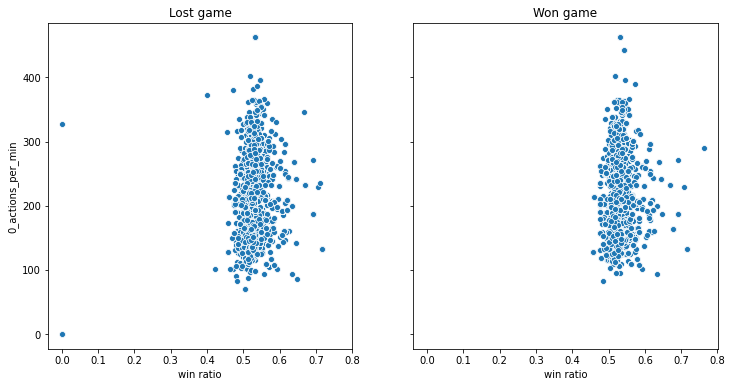

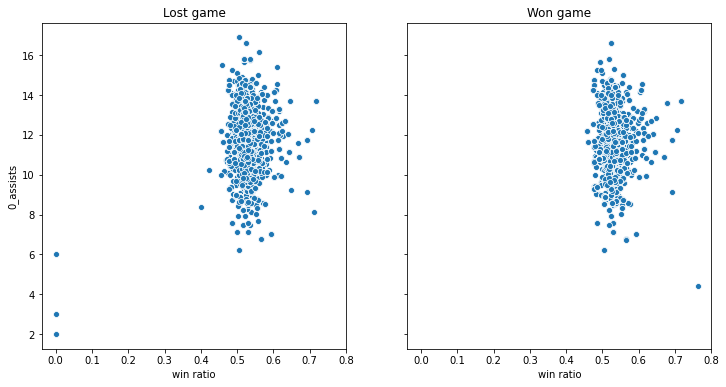

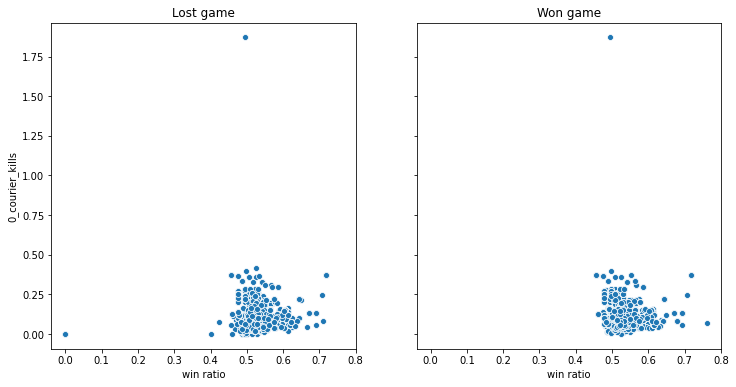

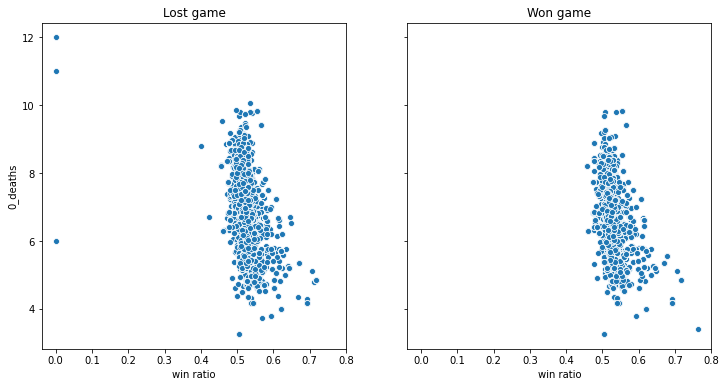

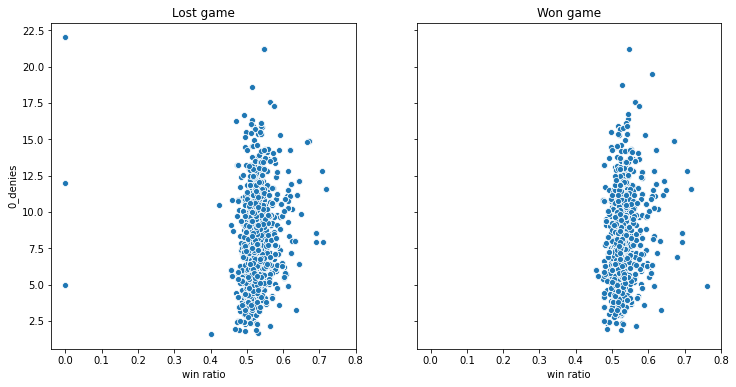

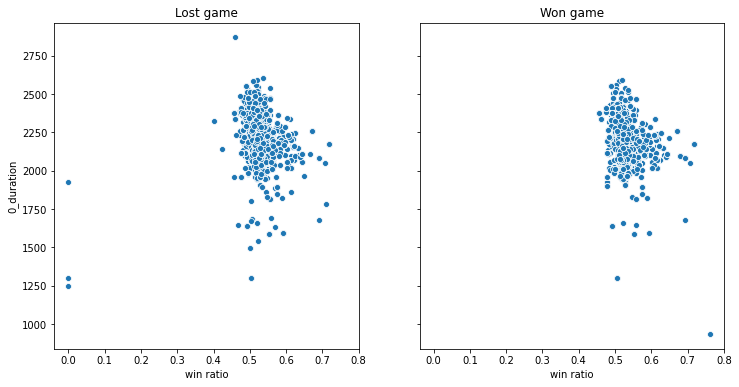

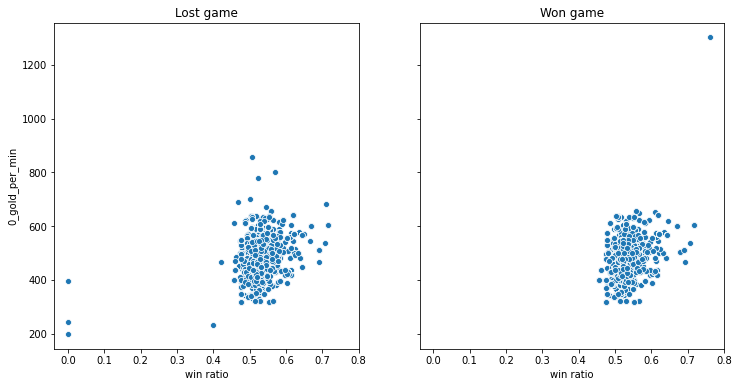

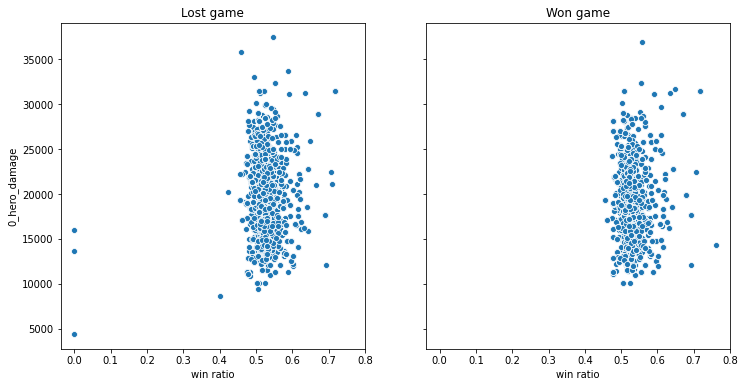

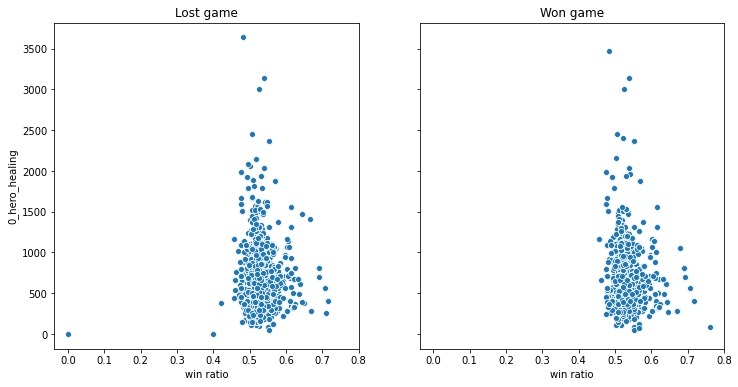

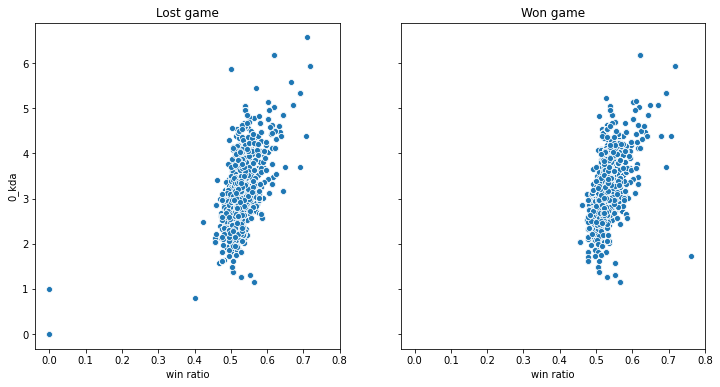

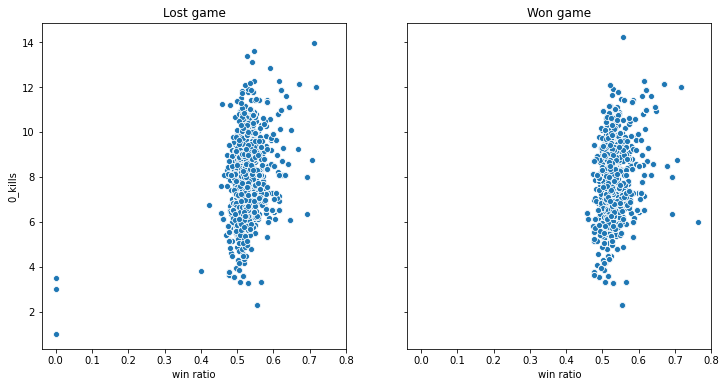

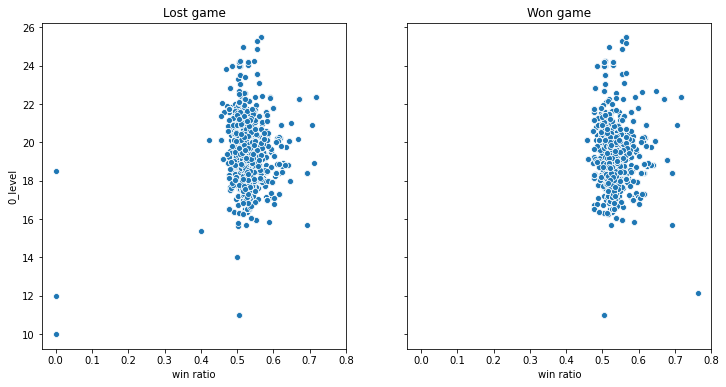

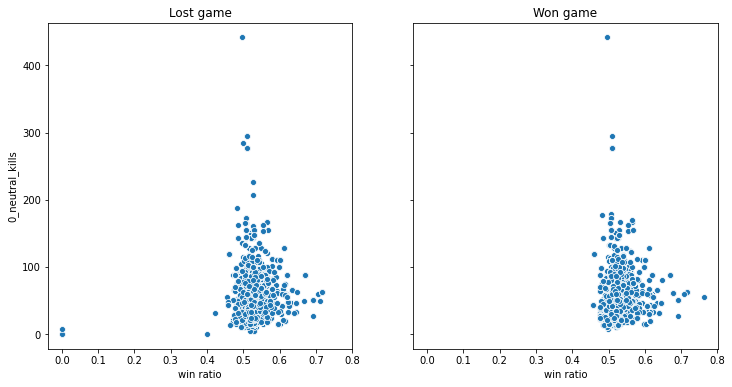

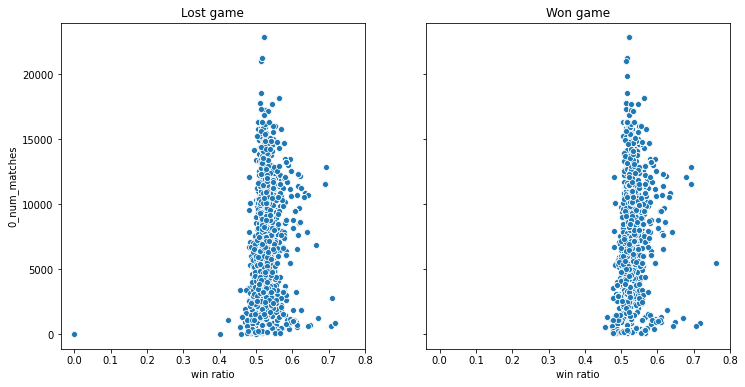

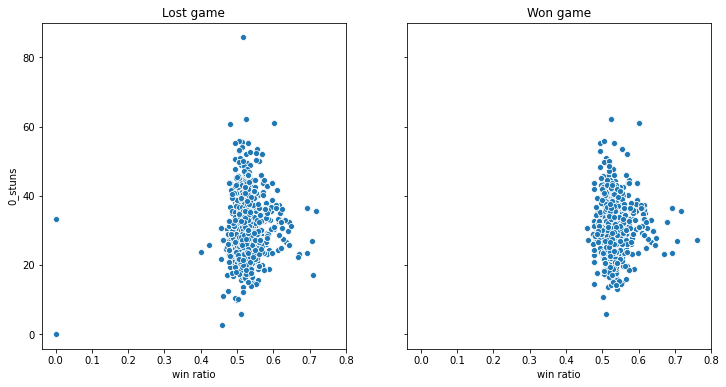

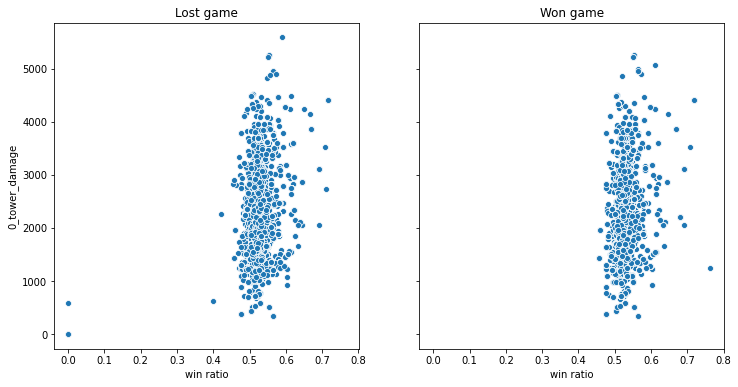

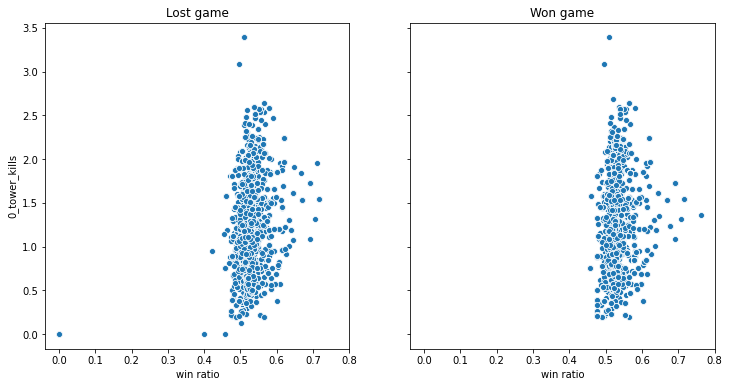

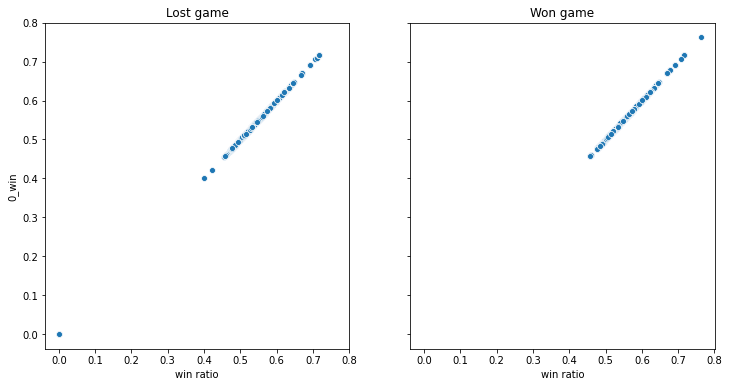

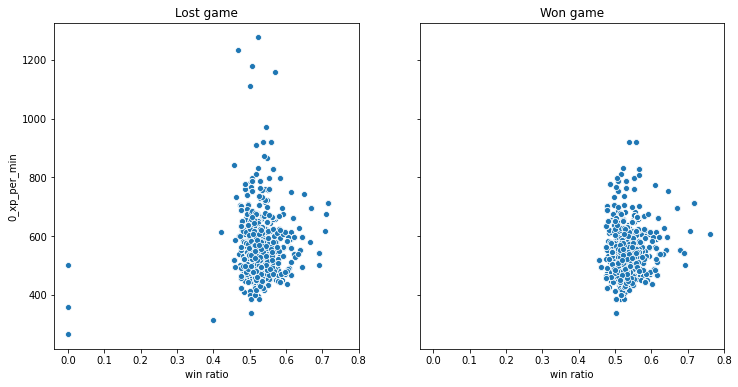

In [123]:
for col in filter_col:      
    properties = {
        'x': "0_win",
        'y': col,
        'x_label': "win ratio",
        'y_label': col,
        'category': "rad_won",
        'category_labels': {
            0: "Lost game",
            1: "Won game",
        }
    }

    plot_data(df, properties)

Generally, if you want to win games, you should die less, kill more (big dependence of kda and win ratio). What's more, there are no big differences in statistics between team that have won and that have lost . That is because the players from dataset are present in both groups - their teams have been winning and losing many matches, so practically, these two sets are almost identical. So try to aggregate each 10 players stats, group it by teams and then let's analyze the diffrence in each attribute between winning and losing team.

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10000 entries, 5150167044.0 to 5146862871.0
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   actions_per_min  10000 non-null  float64
 1   assists          10000 non-null  float64
 2   courier_kills    10000 non-null  float64
 3   deaths           10000 non-null  float64
 4   denies           10000 non-null  float64
 5   duration         10000 non-null  float64
 6   gold_per_min     10000 non-null  float64
 7   hero_damage      10000 non-null  float64
 8   hero_healing     10000 non-null  float64
 9   kda              10000 non-null  float64
 10  kills            10000 non-null  float64
 11  level            10000 non-null  float64
 12  neutral_kills    10000 non-null  float64
 13  num_matches      10000 non-null  float64
 14  stuns            10000 non-null  float64
 15  tower_damage     10000 non-null  float64
 16  tower_kills      10000 non-null  float

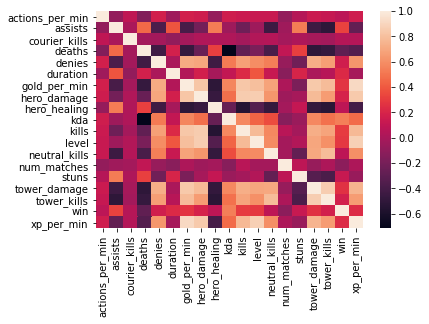

In [133]:
unique_features = []
for col in filter_col:
    unique_features.append(col[2:])
np.random.seed(123)
aggregated_dataset = pd.DataFrame()
for feature in unique_features:
    for player in [0, 9]:
        summed_feature = 0
        summed_feature += df[f"{player}_{feature}"]
        if player<5:
            aggregated_dataset[f"{feature}"] = summed_feature
        else:
            aggregated_dataset[f"{feature}"] -= summed_feature

aggregated_dataset["rad_won"] = df["rad_won"]
dataset = aggregated_dataset
X, y = dataset.iloc[:,:-1],dataset.iloc[:,-1]
# X = preprocessing.StandardScaler().fit_transform(X)
corr = dataset.iloc[:, :len(filter_col)].corr()
ax = sns.heatmap(
    corr,
)
dataset.info()

Above we created aggregated dataset, where each attribute is difference of aggregated statistics of players from each team. There is also heat map, that shows correlations between attributes. The results from heat map confirms our results from plots that are above. Below we will analize that dataset.

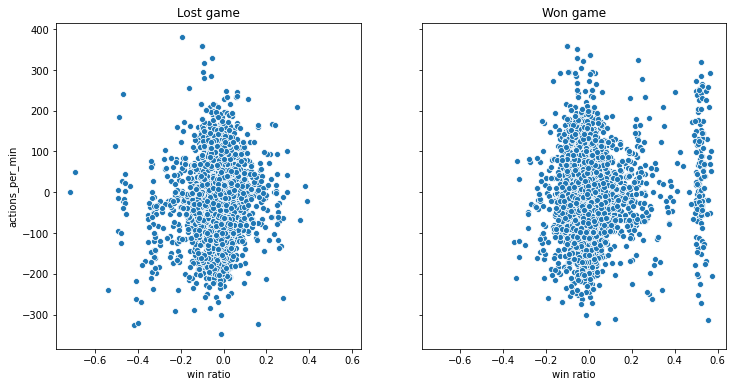

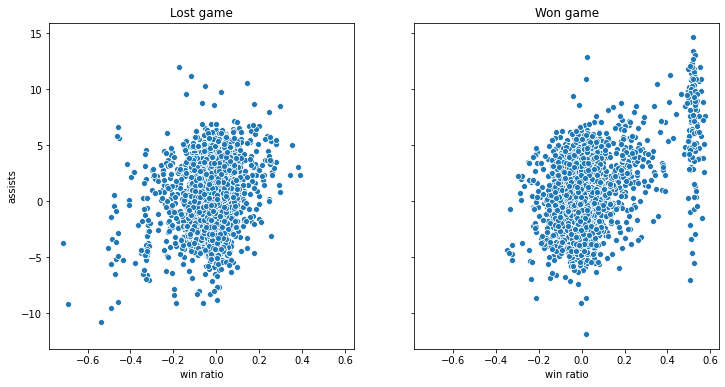

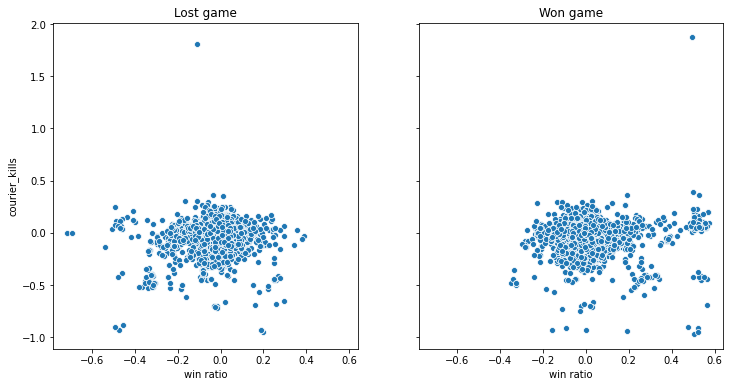

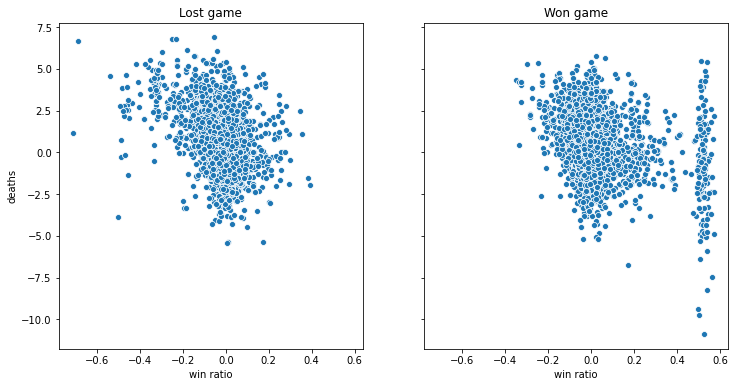

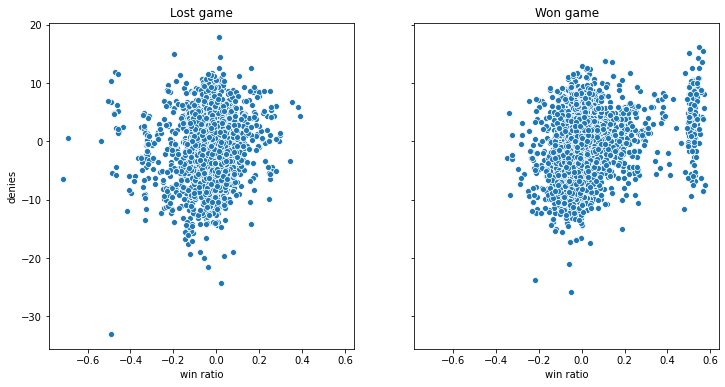

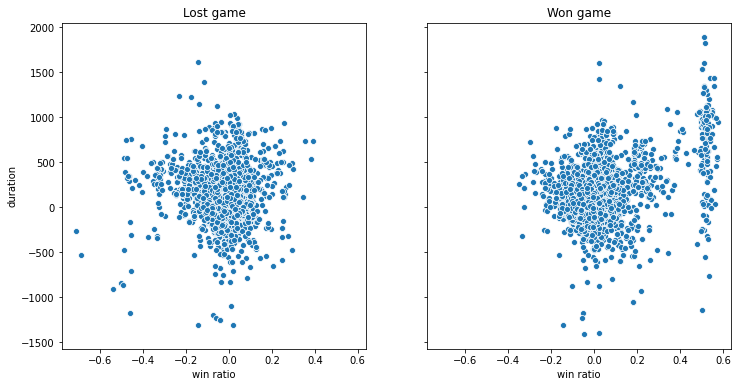

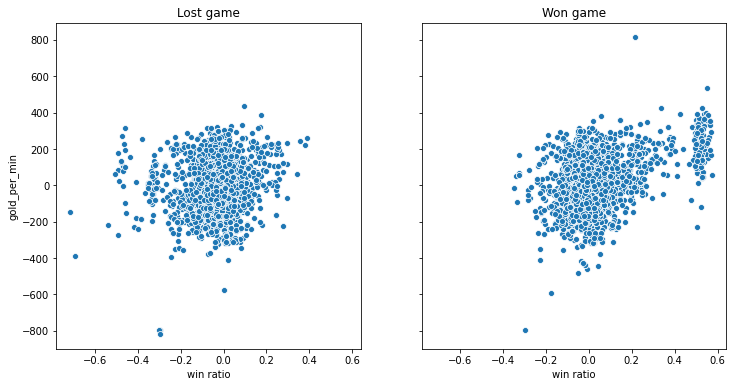

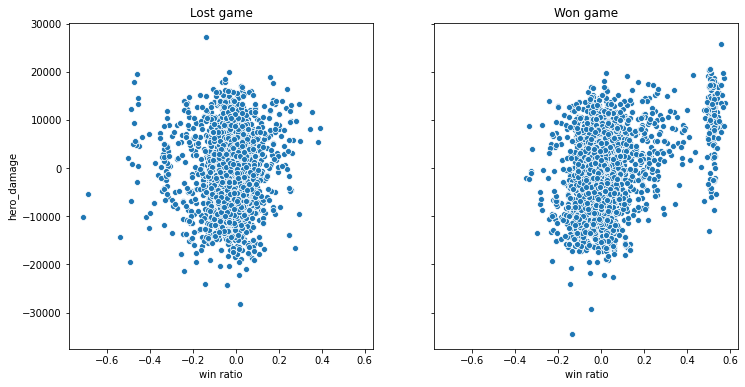

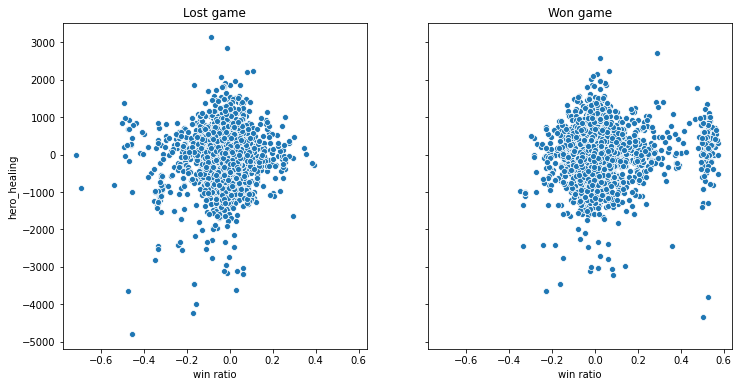

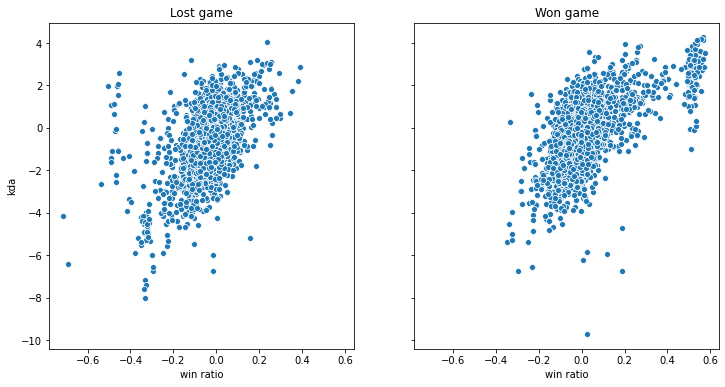

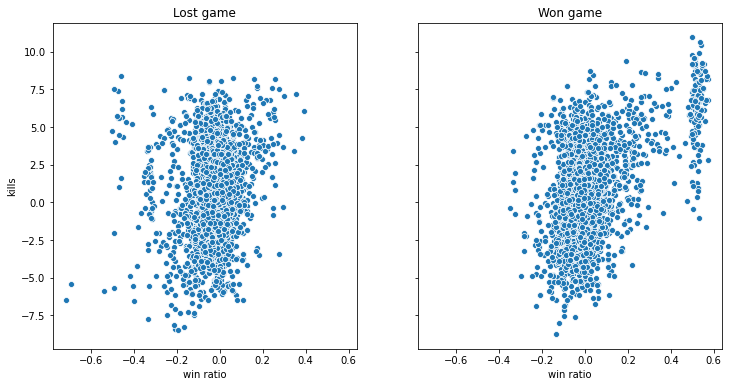

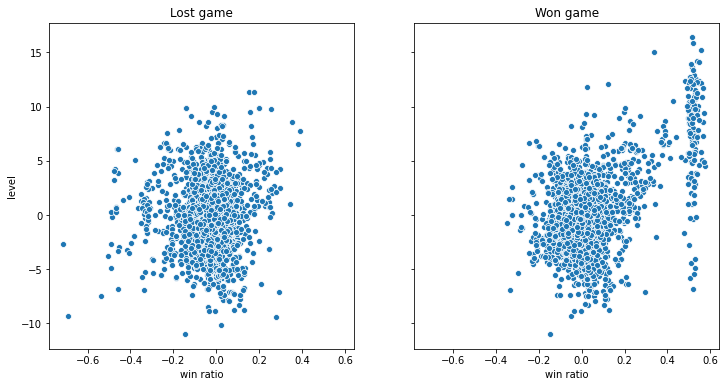

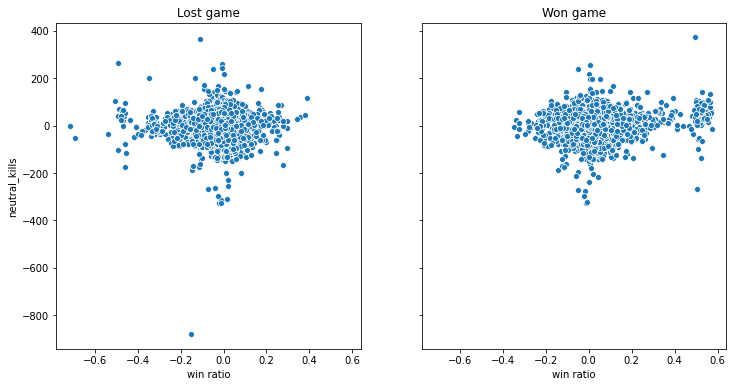

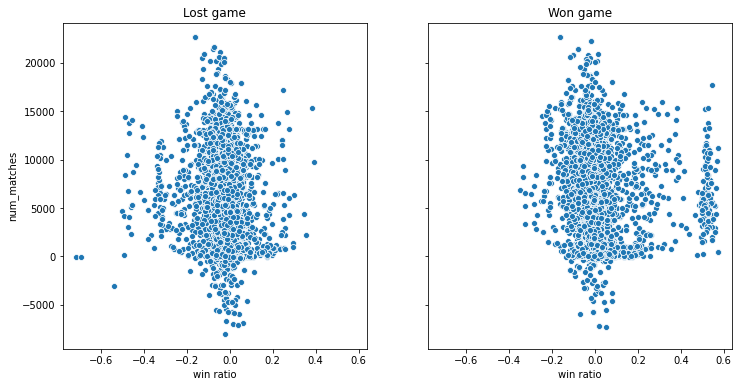

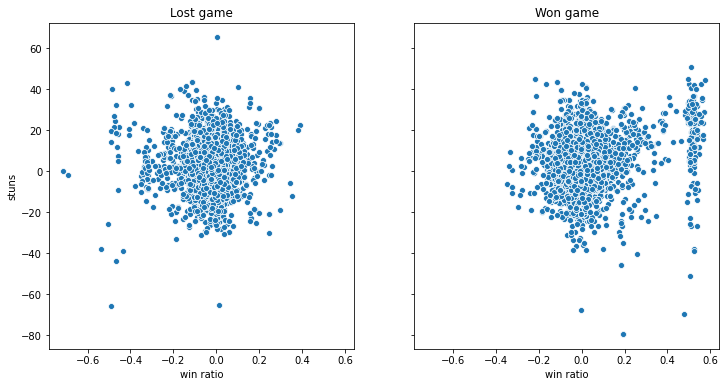

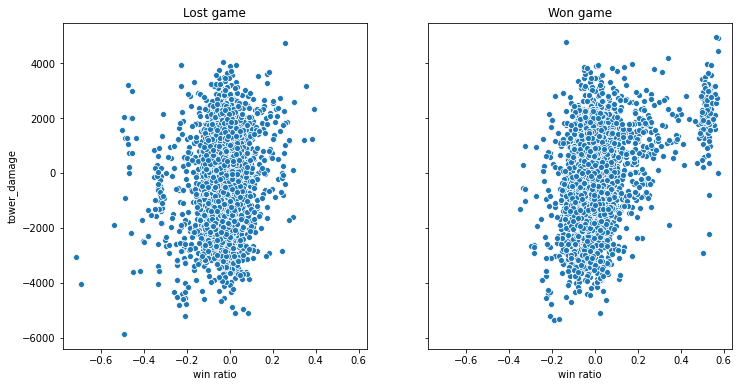

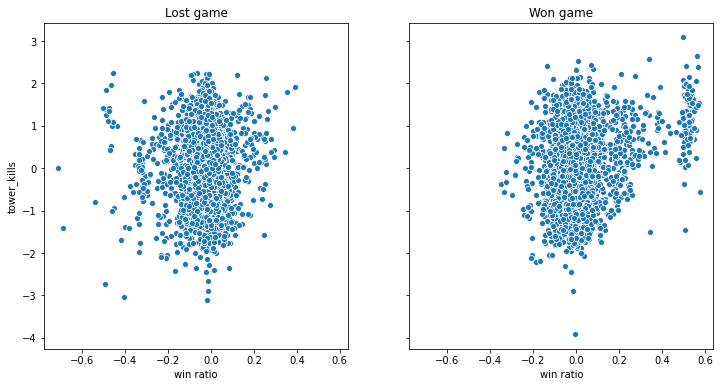

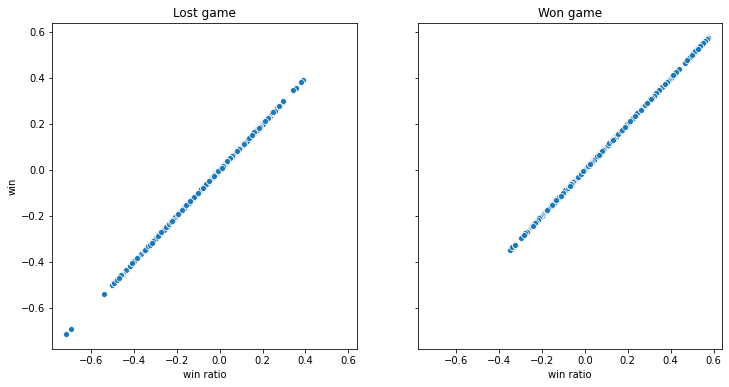

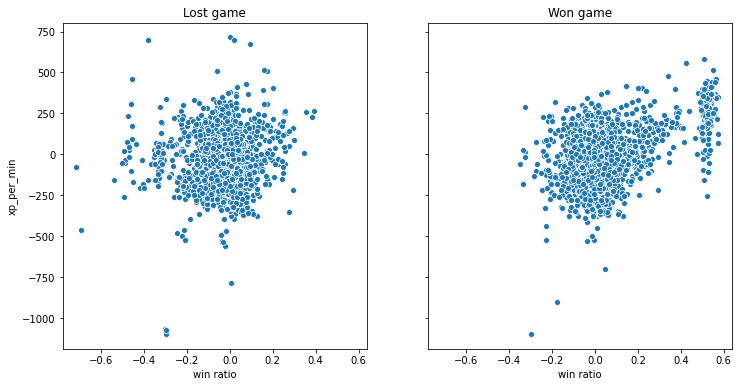

In [138]:
for col in unique_features:      
    properties = {
        'x': "win",
        'y': col,
        'x_label': "win ratio",
        'y_label': col,
        'category': "rad_won",
        'category_labels': {
            0: "Lost game",
            1: "Won game",
        }
    }

    plot_data(dataset, properties)
    
#df[["0_win"]].plot(bins=30, kind="hist")
#dataset[["win"]].hist(bins=30, by=df["rad_won"])

On plots, we can see one very significant thing. In winning set, there is much more dots, which are placed at high "win ratio". So it means, "win ratio" attribute is key statistic in predicting the winner. The other dimension (Y) rarely changed, so others attributes aren't such important. Anyway, we can observe that attributes "kda", "deaths", "assists", "kills", "action_per_minute" differ in both sets.